In [439]:
import pandas as pd
import numpy as np
import re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

In [440]:
df_ive_cat = pd.read_csv("ive_catalunya.csv", sep=";")
df_mujeres = pd.read_csv("mujeres_intencion_3años.csv", sep=";", encoding="latin1")
t5 = pd.read_csv("aborto_metodo.csv", sep=";")#OK3
t6 = pd.read_csv("aborto_edad.csv", sep=";")#OK3
t7 = pd.read_csv("aborto_motivo.csv", sep=";")#OK3
t8 = pd.read_csv("aborto_gestacion.csv", sep=";")#OK3

## Datasets de Interrupcion voluntario de embarazo en Cataluña (IVE)

In [441]:
df_ive_cat.columns

Index(['any', 'tipus de centre', 'mètode', 'finançament públic', 'grup d'edat',
       'situació de convivència', 'fills a càrrec', 'fills vius',
       'país de residència', 'codi de la comarca de residència',
       'nom de la comarca de residència', 'país de naixement',
       'primera nacionalitat', 'situació laboral', 'ingressos',
       'nombre de casos'],
      dtype='object')

db_ive_cat =>>>> catalunya: 
. Any: Desde el 2007 a 2022
. método: Cuales son los metodos mas utilizado por año 
. grupo de edad: Evolucion por año 
                . Si tiene pareja o no 
                . Si tiene hijos o no 
. residencia(nacionalidad): Cuales son las nacionalidades que mas abortas? 
situacion laboral: si influye si esta trabajando o no para que tienden por grupo de edad 
.estado civil
.fills a carrec
. fill vius
mujeres que han abortado que tienen hijos pero no estan a su cargo. 
influye la situacion laboral en mujeres para que aborten y si tienen o no pareja quiero ver si es posible hacer una correlacion al respecto 
Cifra por año y tipo de métodos y motivo 
Causas( que influye) correlacionar de la edad de causas 
Cuál es el método más utilizado 
Explicar los tipos de métodos 
Especificar 
Las personas que trabajan y qué edades 
Las mujeres que tienen hijo por edad y las que no pero todo por edades
Cuáles son las que más aborta las extranjera o españolas 
Lo de la gestación cuantos casos por gestación hay 


In [442]:
df_ive_cat["ingressos"] = df_ive_cat["ingressos"].replace(
    {"No hi consta": "No"})

In [443]:
df_ive_cat["situació laboral"] = df_ive_cat["situació laboral"].replace(
    {"Aturada o a la recerca de la primera feina remunerada": "Aturada", "Altres": "No hi consta"}
)

In [444]:
df_ive_cat = df_ive_cat.rename(columns={'tipus de centre': 'centres', 'situació de convivència': 'estat civil', 'país de residència': 'residència'
                                        , 'nom de la comarca de residència': 'comarca'})

In [445]:
df_ive_cat["mètode"] = df_ive_cat["mètode"].replace(
    {"Altres": "No hi consta"}
)

In [446]:
df_ive_cat["mètode"] = df_ive_cat["mètode"].replace({'Tractament farmacològic (Mifepristona+Misprostol)': 'Mifepristona+Misprostol', 'Fracàs TF + dilatació + aspiració / evacuació / raspament': 'raspament', 'Dilatació i raspament de l’úter': 'Dilatació i raspament'})

In [447]:
df_ive_cat["grup d'edat"] = (
    df_ive_cat["grup d'edat"]
    .str.replace("anys", "", regex=False)
    .str.strip()
)


In [448]:
df_ive_cat["fills a càrrec"] = (
    df_ive_cat["fills a càrrec"]
    .str.replace("No hi consta", "Sense fills", regex=False)
    .str.strip()
    )

empieza...

In [449]:
df_ive_cat.head()

,any,centres,mètode,finançament públic,grup d'edat,estat civil,fills a càrrec,fills vius,residència,codi de la comarca de residència,comarca,país de naixement,primera nacionalitat,situació laboral,ingressos,nombre de casos
0,2007,Centre de fora de Catalunya,Farmacològic,No hi consta,20 a 24,En parella,Sense fills,Cap fill viu,Espanya,22,Montsià,Fora d'Espanya,No Espanyola,Aturada,No,1
1,2007,Centre de fora de Catalunya,Farmacològic,No hi consta,35 a 39,En parella,Sense fills,Cap fill viu,Espanya,9,Baix Ebre,Espanya,Espanyola,Treballadora,Sí,1
2,2007,Centre de fora de Catalunya,Quirúrgic,No hi consta,0 a 19,En parella,Sense fills,Cap fill viu,Espanya,7,Bages,Espanya,Espanyola,No hi consta,Sí,1
3,2007,Centre de fora de Catalunya,Quirúrgic,No hi consta,0 a 19,En parella,Sense fills,Cap fill viu,Espanya,13,Barcelonès,Fora d'Espanya,No Espanyola,Treballadora,Sí,2
4,2007,Centre de fora de Catalunya,Quirúrgic,No hi consta,0 a 19,En parella,Sense fills,Cap fill viu,Espanya,21,Maresme,Espanya,Espanyola,Aturada,No,1


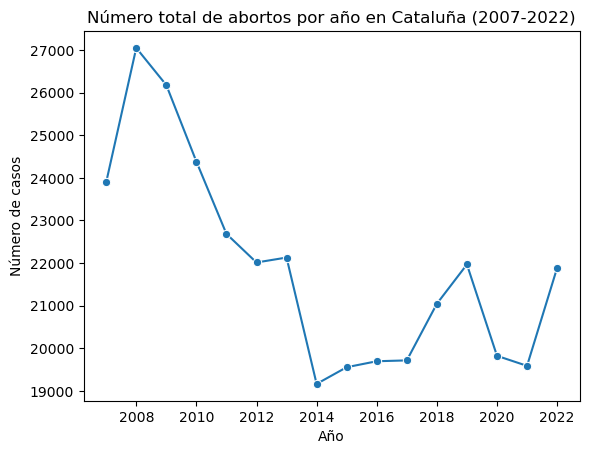

In [450]:
#numero de abortos por año. 
cases_year = df_ive_cat.groupby("any")["nombre de casos"].sum().reset_index()

plt.figure()
sns.lineplot(data=cases_year, x="any", y="nombre de casos", marker="o")
plt.title("Número total de abortos por año en Cataluña (2007-2022)")
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.show()


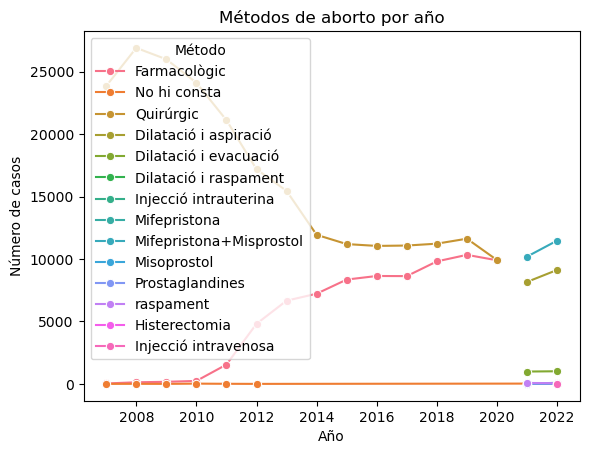

In [451]:
methods_year = df_ive_cat.groupby(["any","mètode"])["nombre de casos"].sum().reset_index()

plt.figure()
sns.lineplot(data=methods_year, x="any", y="nombre de casos", hue="mètode", marker="o")
plt.title("Métodos de aborto por año")
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(title="Método")
plt.show()


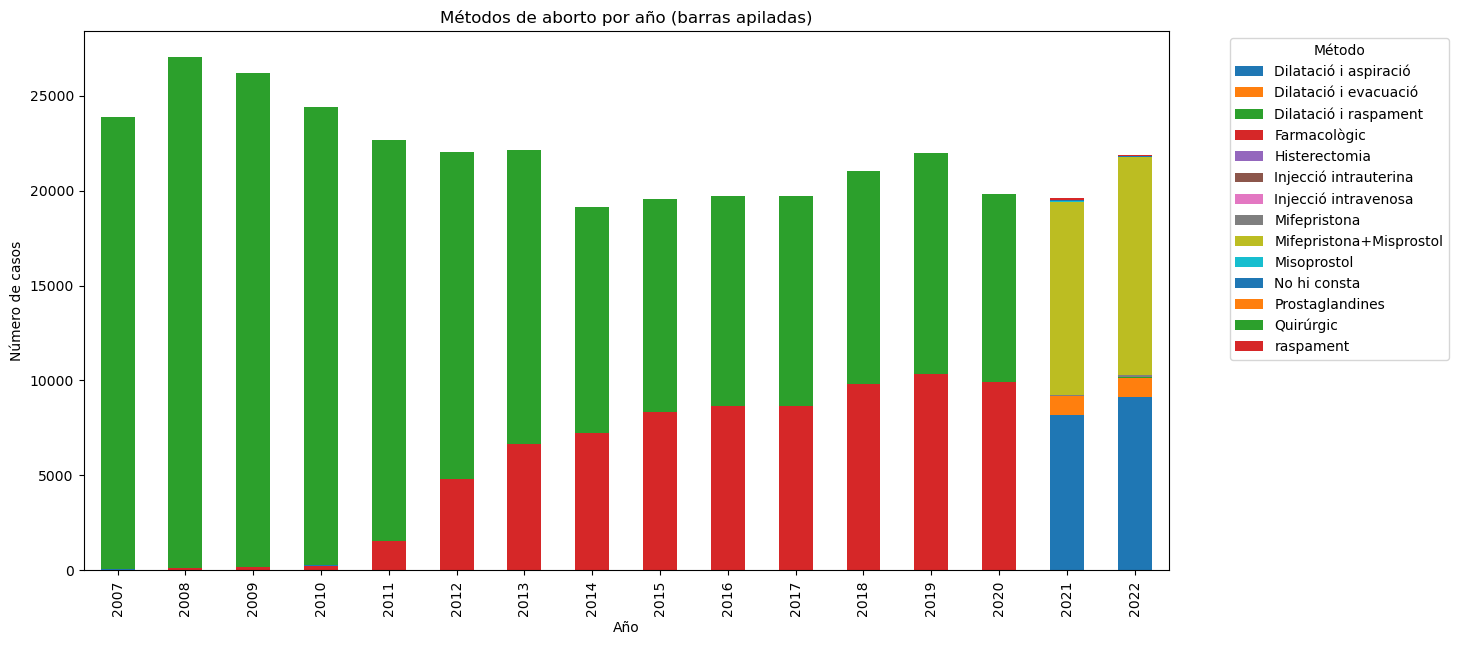

In [452]:
# Pivotar datos para gráfico de barras apiladas
methods_pivot = methods_year.pivot(index='any', columns='mètode', values='nombre de casos').fillna(0)

# Gráfico de barras apiladas
methods_pivot.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title("Métodos de aborto por año (barras apiladas)")
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(title="Método", bbox_to_anchor=(1.05, 1))
plt.show()


In [453]:
quirurgic = df_ive_cat[df_ive_cat["mètode"].str.contains("Quirúrgic", case=False, na=False)]

# Total por año
quirurgic_by_year = quirurgic.groupby("any")["nombre de casos"].sum().reset_index()
print(quirurgic_by_year)


     any  nombre de casos
0   2007            23856
1   2008            26907
2   2009            26000
3   2010            24116
4   2011            21124
5   2012            17194
6   2013            15462
7   2014            11939
8   2015            11199
9   2016            11052
10  2017            11082
11  2018            11232
12  2019            11631
13  2020             9920


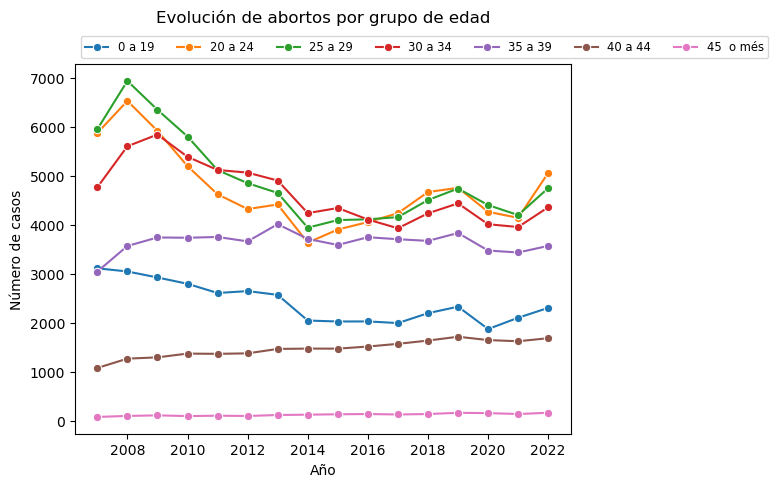

In [454]:
#Distribución por grupo de edad
age_group_year = df_ive_cat.groupby(["any","grup d'edat"])["nombre de casos"].sum().reset_index()

plt.figure()
sns.lineplot(data=age_group_year, x="any", y="nombre de casos", hue="grup d'edat", marker="o")
plt.title("Evolución de abortos por grupo de edad", pad=30)
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(ncols=len("grup d'edat"), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')#title="Grupo de edad", loc='upper right', borderaxespad=0.)
plt.show()


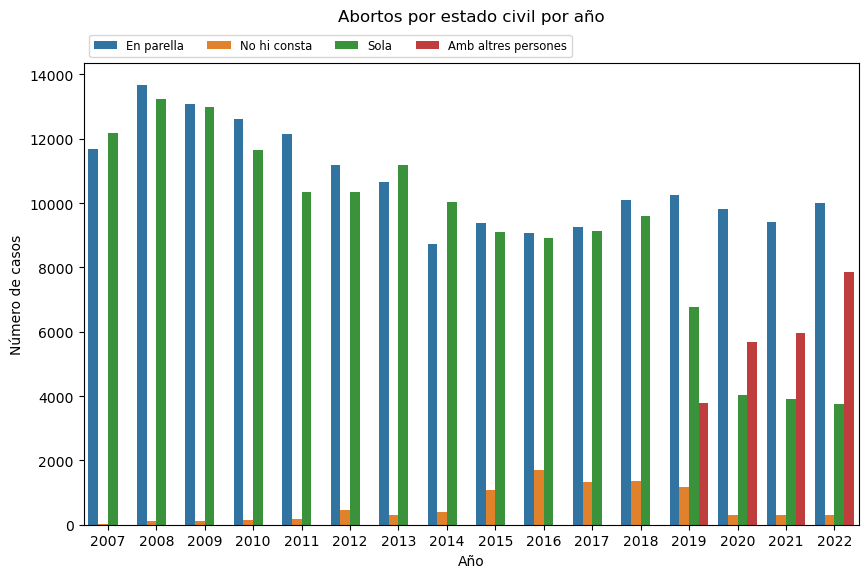

In [455]:
#Estado civil y pareja
marital_status_year = df_ive_cat.groupby(["any","estat civil"])["nombre de casos"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=marital_status_year, x="any", y="nombre de casos", hue="estat civil")
plt.title("Abortos por estado civil por año", pad=30)
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(ncols=len("Estado Civil"), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
plt.show()


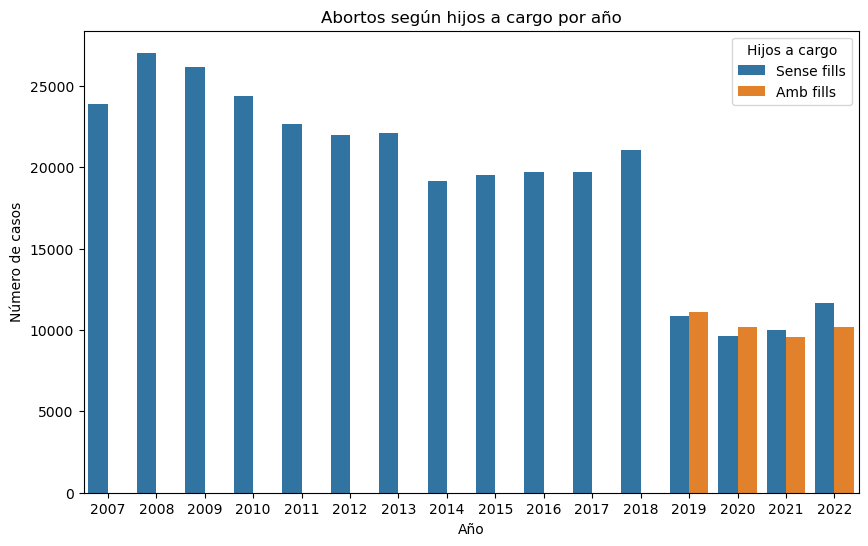

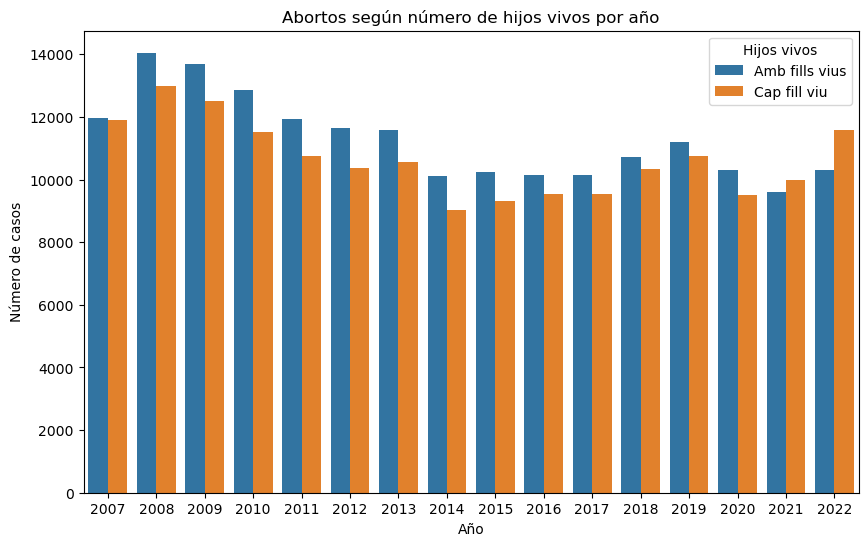

In [456]:
# Mujeres con hijos a cargo
children_year = df_ive_cat.groupby(["any","fills a càrrec"])["nombre de casos"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=children_year, x="any", y="nombre de casos", hue="fills a càrrec")
plt.title("Abortos según hijos a cargo por año")
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(title="Hijos a cargo")
plt.show()

# Hijos vivos
children_alive_year = df_ive_cat.groupby(["any","fills vius"])["nombre de casos"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=children_alive_year, x="any", y="nombre de casos", hue="fills vius")
plt.title("Abortos según número de hijos vivos por año")
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(title="Hijos vivos")
plt.show()


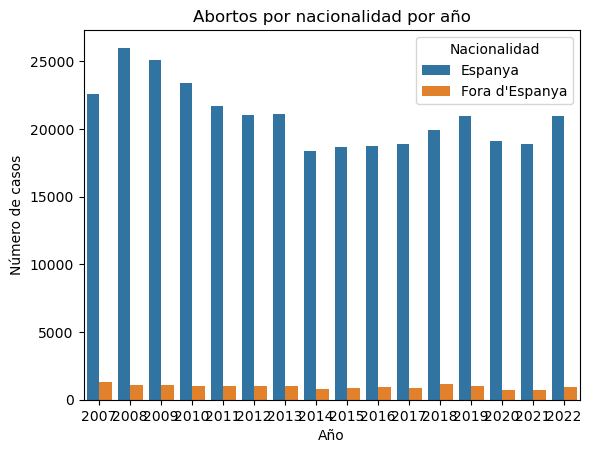

In [457]:
#Nacionalidad
nationality_year = df_ive_cat.groupby(["any","residència"])["nombre de casos"].sum().reset_index()

plt.figure()
sns.barplot(data=nationality_year, x="any", y="nombre de casos", hue="residència")
plt.title("Abortos por nacionalidad por año")
plt.xlabel("Año")
plt.ylabel("Número de casos")
plt.legend(title="Nacionalidad")
plt.show()


In [458]:
# Métodos
method_colors = {
    'Farmacològic': '#1f77b4', 'Quirúrgic': '#ff7f0e', 'Dilatació i evacuació': '#2ca02c',
    'No hi consta': '#d62728', 'Dilatació i aspiració': '#9467bd', 'Mifepristona+Misprostol': '#8c564b',
    'Mifepristona': '#e377c2', 'Misoprostol': '#7f7f7f', 'Injecció intrauterina': '#bcbd22',
    'raspament': '#17becf', 'Prostaglandines': '#aec7e8', 'Dilatació i raspament': '#ffbb78',
    'Histerectomia': '#98df8a', 'Injecció intravenosa': '#ff9896'
}

# Edad
#age_colors = sns.color_palette("coolwarm", n_colors=8)
age_colors = {
    '0 a 19': '#FFFFE0', '20 a 24':'#FFDAB9', '25 a 29': '#98FB98', '30 a 34': '#ADD8E6', '35 a 39': '#4169E1', '40 a 44': '#DDA0DD',
       '45  o més': '#D3D3D3'
}

# Estado civil
civil_colors = {
    'Soltera': '#1f77b4', 'Casada': '#ff7f0e', 'Separada/Divorciada': '#2ca02c', 'Viuda': '#d62728'
}

# Nacionalidad
nac_colors = sns.color_palette("Set2", n_colors=10)

# Situación laboral
labor_colors = {
    'Treballa': '#1f77b4', 'No treballa': '#ff7f0e', 'Estudiant': '#2ca02c', 'Altres': '#d62728'
}


In [459]:
df_ive_cat["estat civil"] = df_ive_cat["estat civil"].replace(
    {"No hi consta" : "Amb altres persones"}
)

/var/folders/7n/ttps7twj3yq842k05ls60w5r0000gp/T/ipykernel_27134/3082777935.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ive_cat.groupby('any')['nombre de casos'].sum().reset_index(),


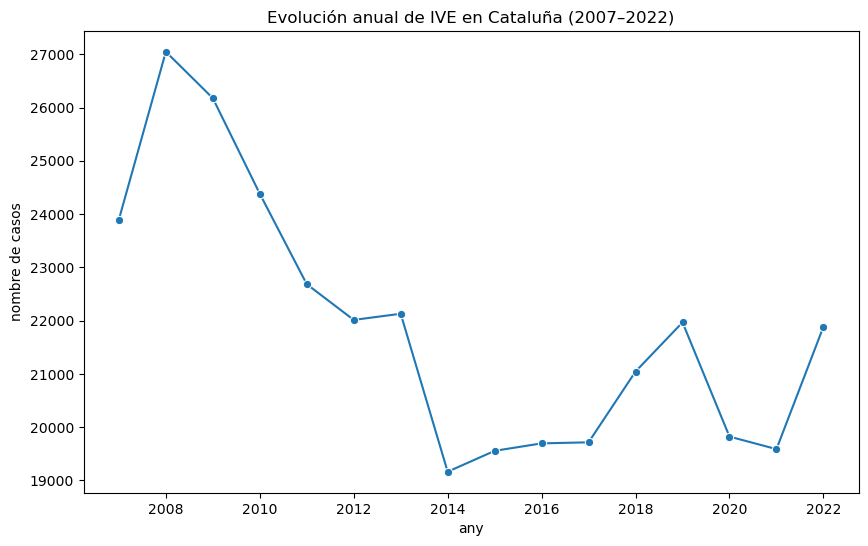

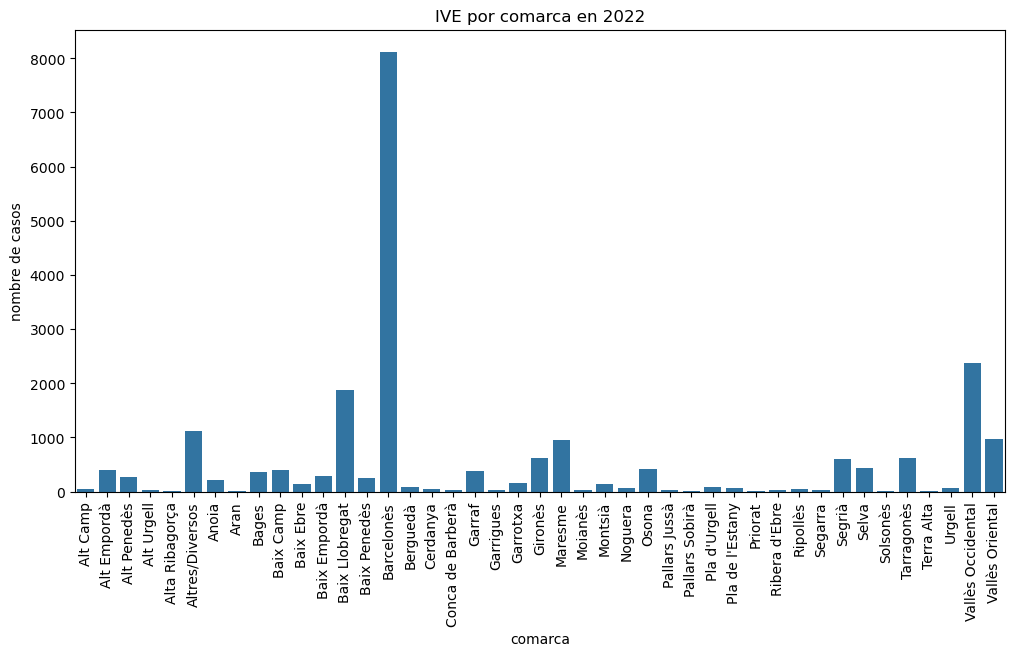

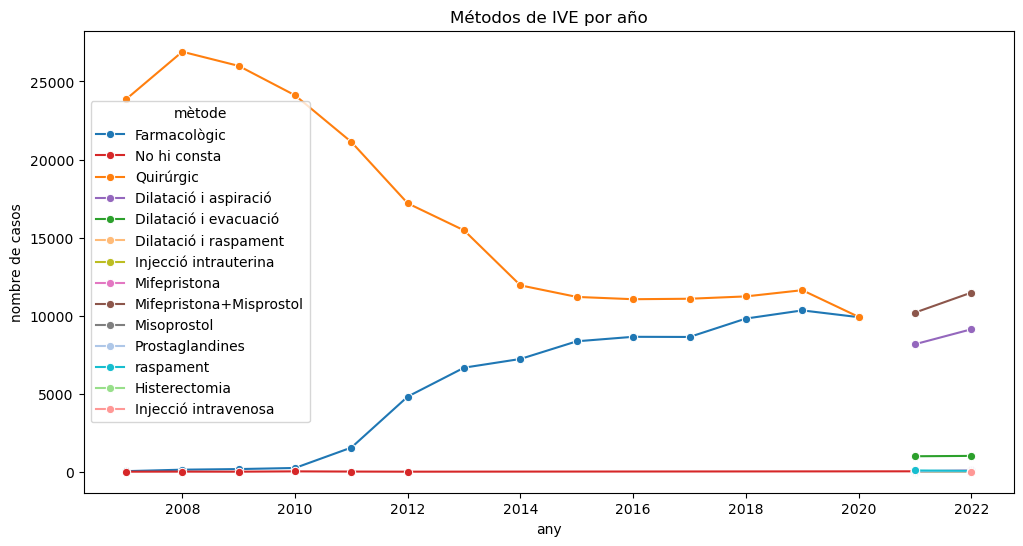

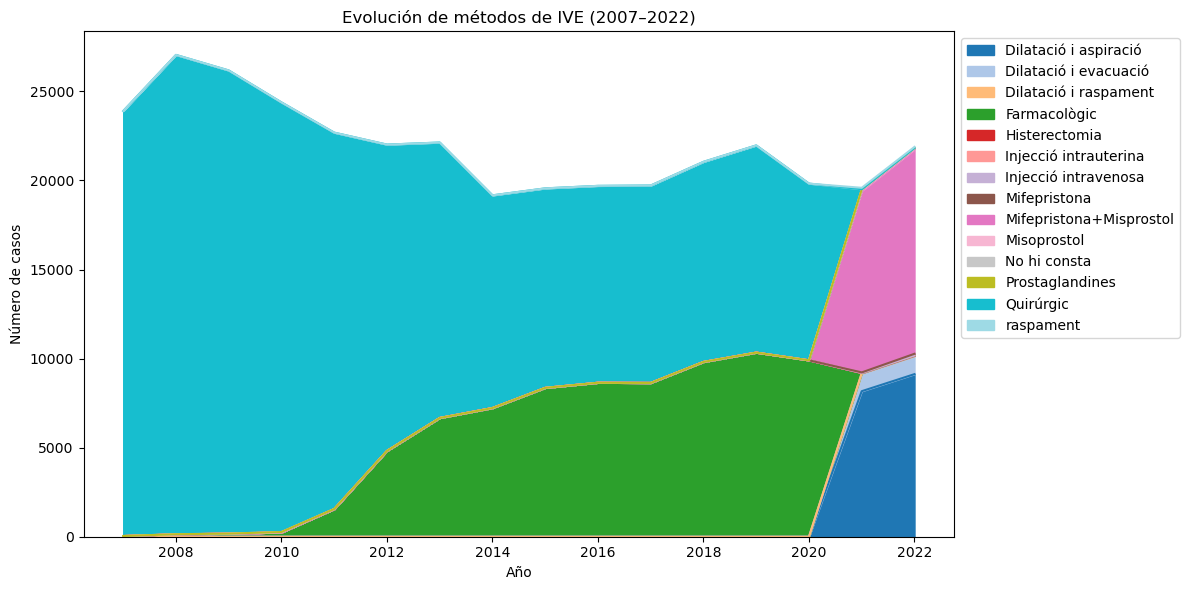

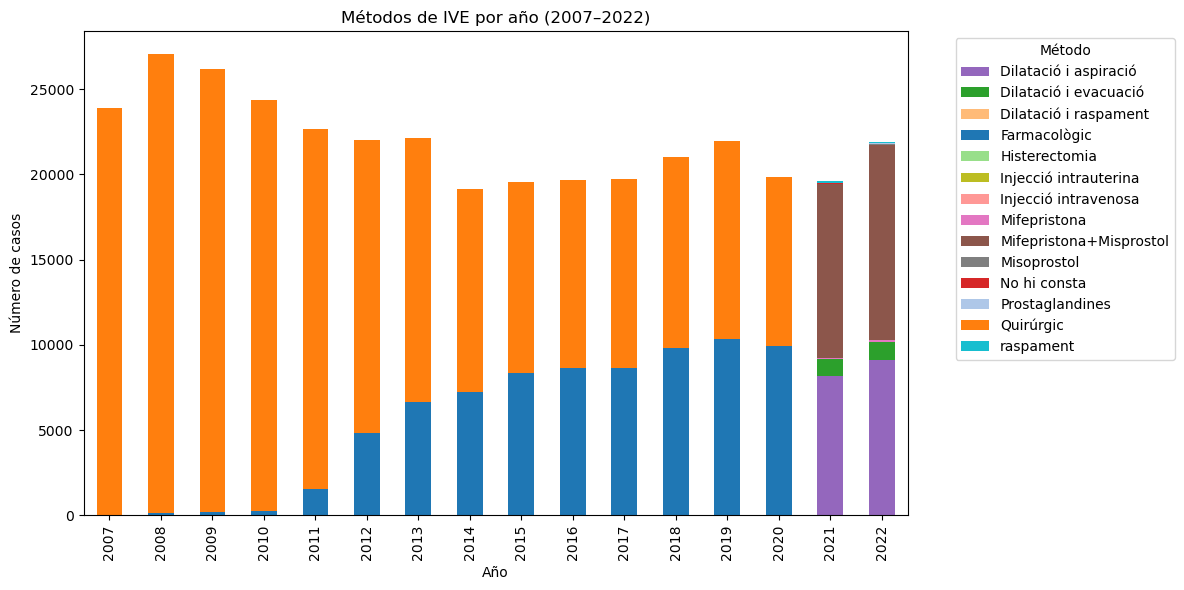

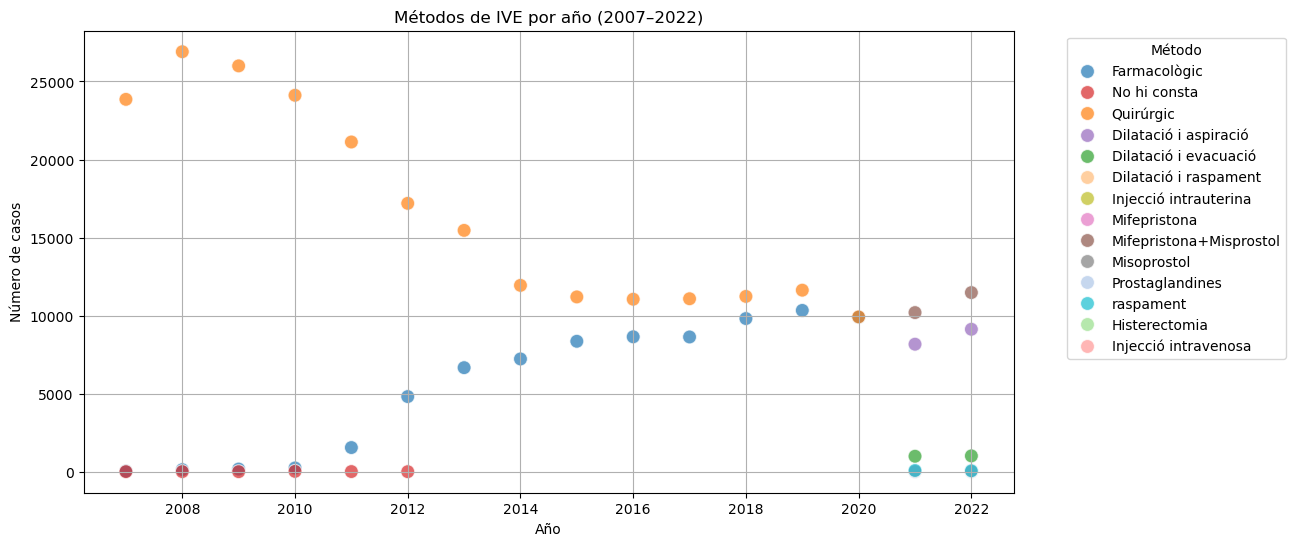

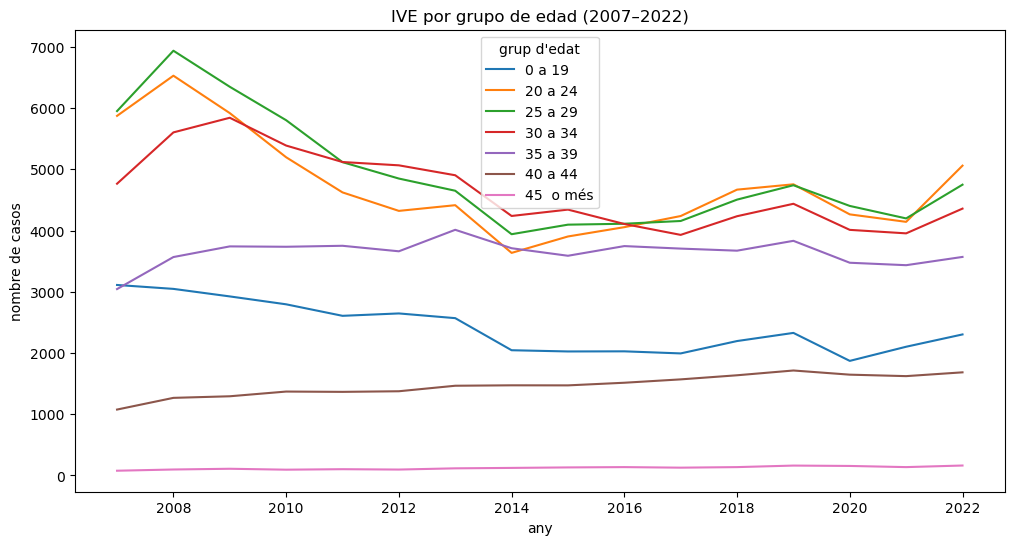

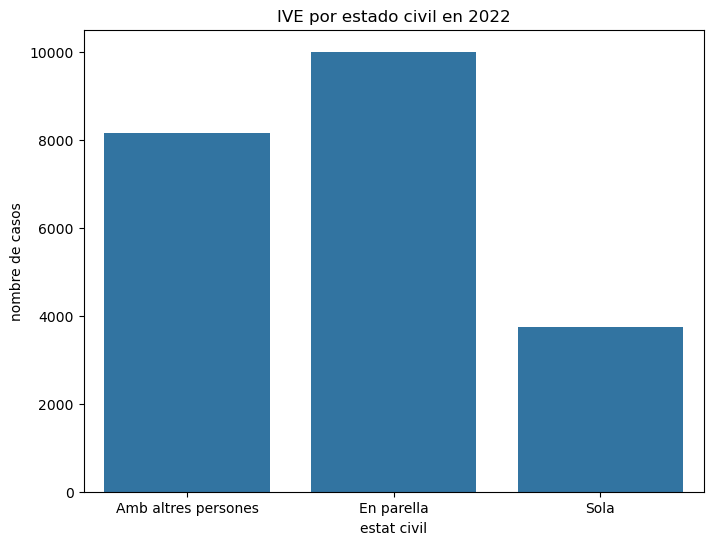

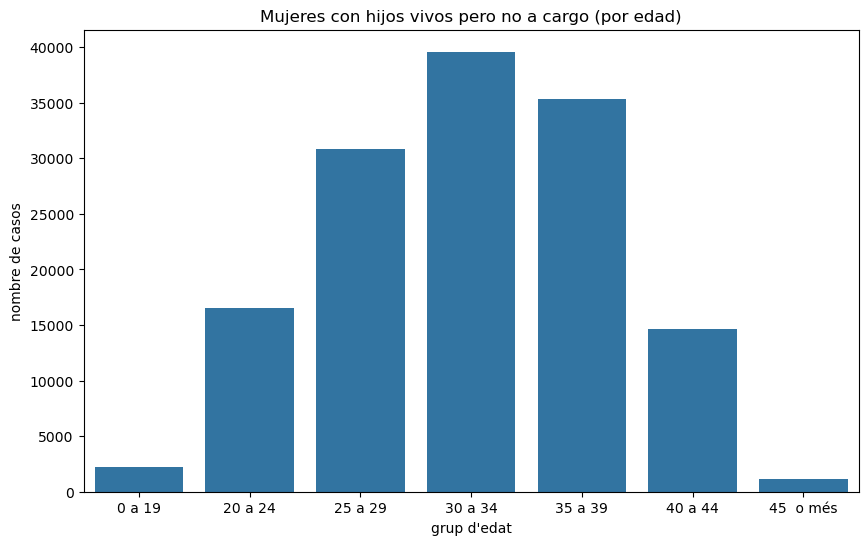

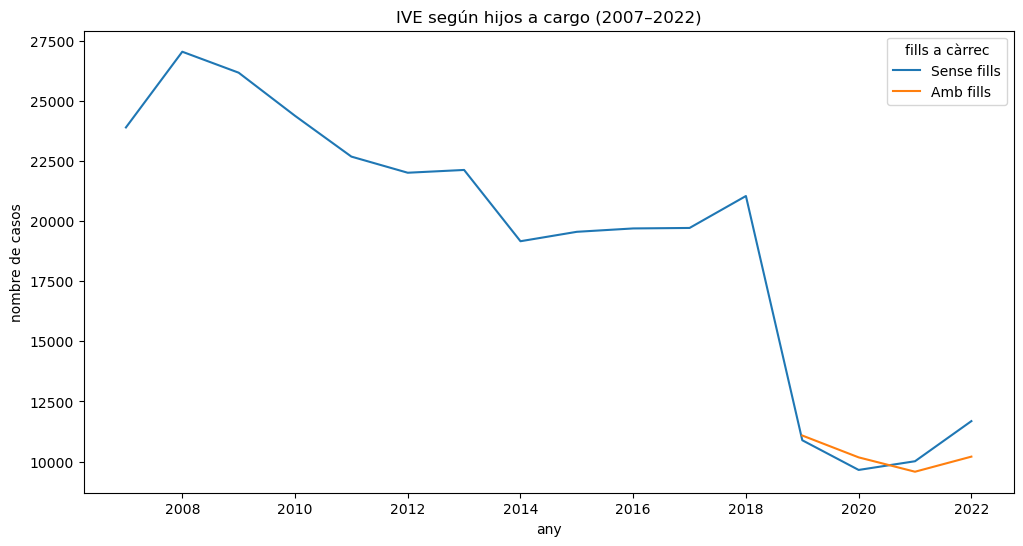

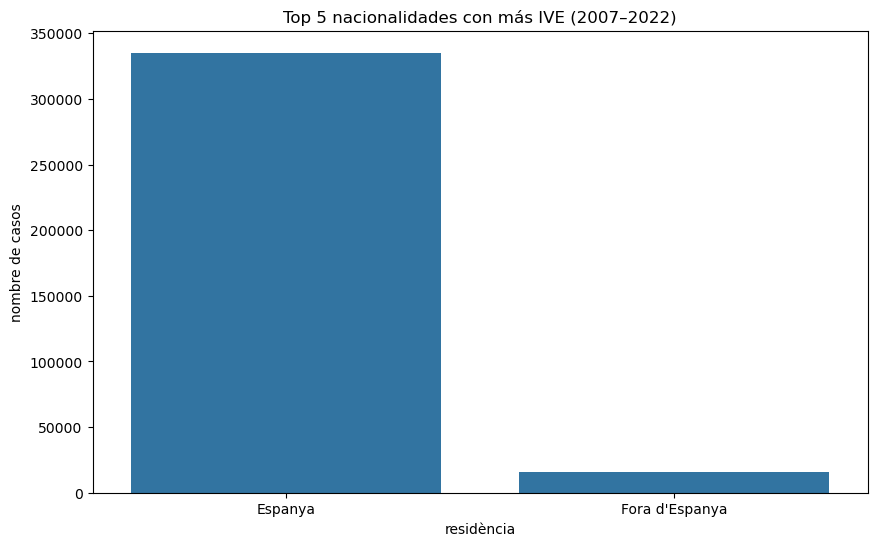

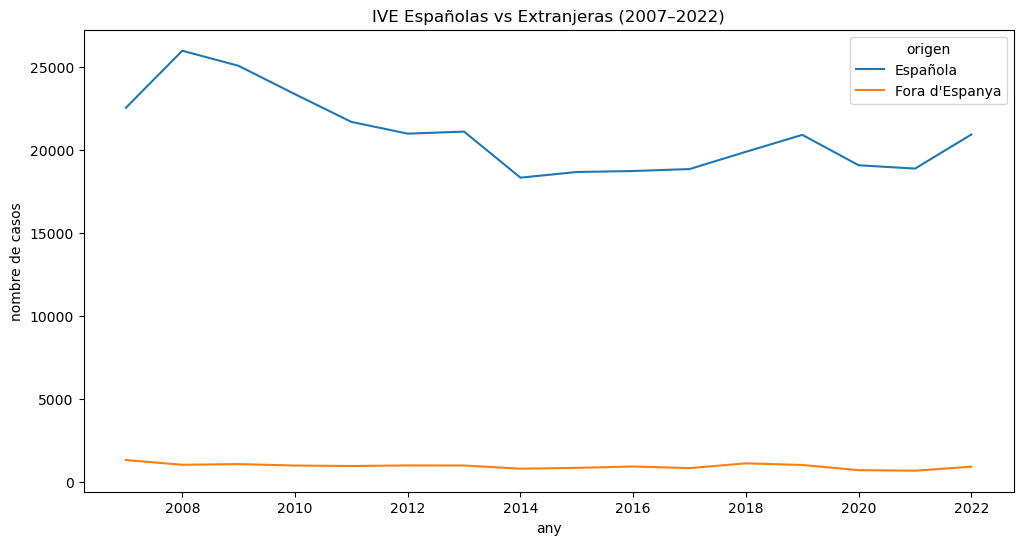

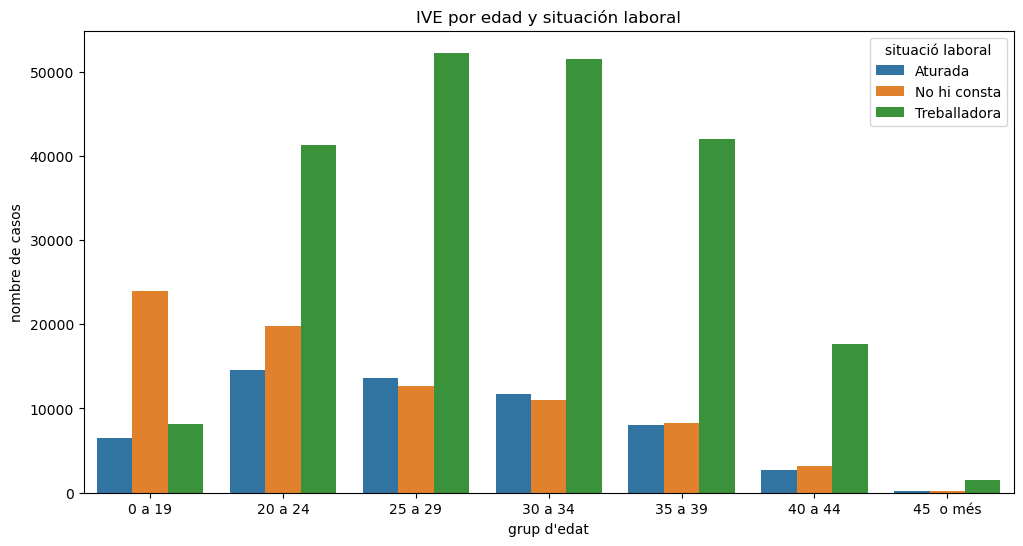

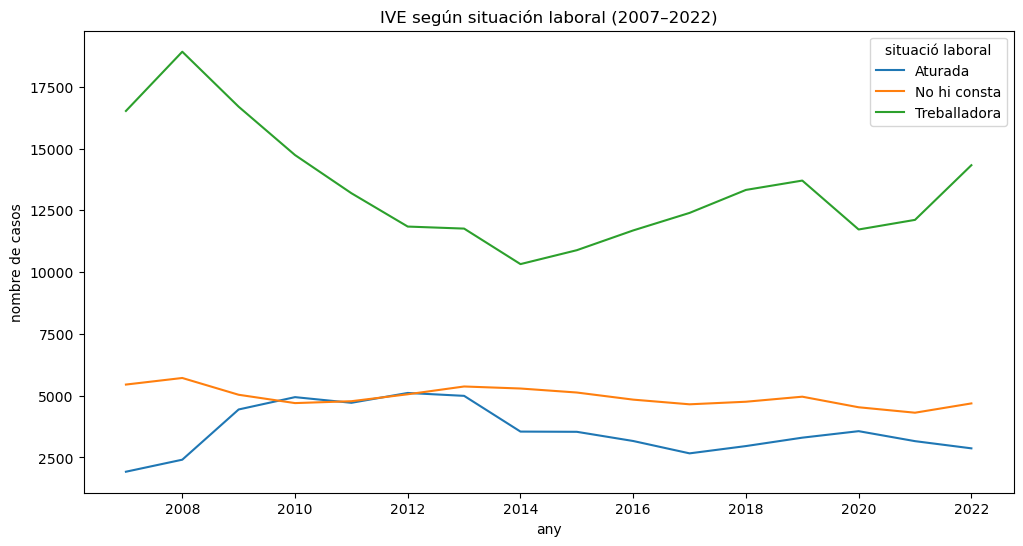

<Axes: xlabel='estat civil', ylabel='situació laboral'>

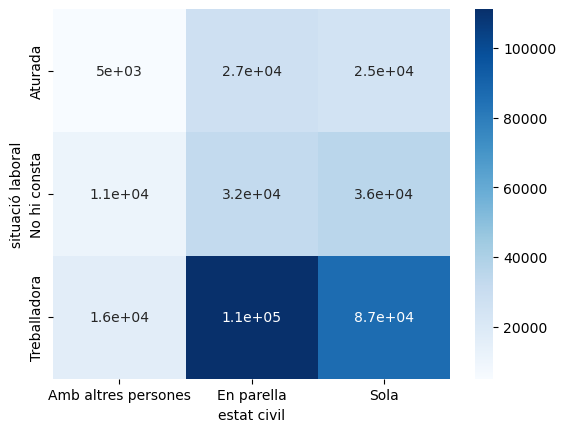

In [460]:


# Ejemplo 1: Evolución anual total
plt.figure(figsize=(10,6))
sns.lineplot(data=df_ive_cat.groupby('any')['nombre de casos'].sum().reset_index(),
             x='any', y='nombre de casos',palette=method_colors, marker='o')
plt.title('Evolución anual de IVE en Cataluña (2007–2022)')
plt.show()

# Ejemplo 2: Distribución por comarca en un año concreto (ej. 2022)
plt.figure(figsize=(12,6))
sns.barplot(data=df_ive_cat[df_ive_cat['any']==2022].groupby('comarca')['nombre de casos'].sum().reset_index(),
            x='comarca', y='nombre de casos')
plt.xticks(rotation=90)
plt.title('IVE por comarca en 2022')
plt.show()

# ---------------------------
# 2. Métodos
# ---------------------------

# Ejemplo 3: Métodos más usados por año
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ive_cat.groupby(['any','mètode'])['nombre de casos'].sum().reset_index(),
             x='any', y='nombre de casos', hue='mètode', palette=method_colors, marker='o')
plt.title('Métodos de IVE por año')
plt.show()

df_year_method = df_ive_cat.groupby(['any','mètode'])['nombre de casos'].sum().unstack().fillna(0)
df_year_method.plot(kind='area', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Evolución de métodos de IVE (2007–2022)')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

## ----------------------------
df_year_method = df_ive_cat.groupby(['any','mètode'])['nombre de casos'].sum().unstack().fillna(0)

# Usar tu paleta de colores personalizada
df_year_method.plot(kind='bar', stacked=True, figsize=(12,6), color=[method_colors.get(m, '#333333') for m in df_year_method.columns])
plt.title('Métodos de IVE por año (2007–2022)')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.legend(title='Método', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# scatterplot por metodos de color 
df_scatter = df_ive_cat.groupby(['any','mètode'])['nombre de casos'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_scatter,
    x='any', y='nombre de casos',
    hue='mètode',
    palette=method_colors,
    s=100, alpha=0.7
)
plt.title('Métodos de IVE por año (2007–2022)')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.legend(title='Método', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.show()



# ---------------------------
# 3. Edad y estado civil
# ---------------------------

# Ejemplo 5: Evolución por grupo de edad
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ive_cat.groupby(['any','grup d\'edat'])['nombre de casos'].sum().reset_index(),
             x='any', y='nombre de casos', hue='grup d\'edat' )
plt.title('IVE por grupo de edad (2007–2022)')
plt.show()

# Ejemplo 6: Estado civil en 2022
plt.figure(figsize=(8,6))
sns.barplot(data=df_ive_cat[df_ive_cat['any']==2022].groupby('estat civil')['nombre de casos'].sum().reset_index(),
            x='estat civil', y='nombre de casos')
plt.title('IVE por estado civil en 2022')
plt.show()

# ---------------------------
# 4. Hijos y cuidados
# ---------------------------

# Ejemplo 7: Mujeres con hijos vivos pero no a cargo
plt.figure(figsize=(10,6))
subset = df_ive_cat[(df_ive_cat['fills vius']=='Amb fills vius') & (df_ive_cat['fills a càrrec']=='Sense fills')]
sns.barplot(data=subset.groupby('grup d\'edat')['nombre de casos'].sum().reset_index(),
            x='grup d\'edat', y='nombre de casos')
plt.title('Mujeres con hijos vivos pero no a cargo (por edad)')
plt.show()

# Ejemplo 8: Evolución de mujeres con hijos a cargo vs sin cargo
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ive_cat.groupby(['any','fills a càrrec'])['nombre de casos'].sum().reset_index(),
             x='any', y='nombre de casos', hue='fills a càrrec')
plt.title('IVE según hijos a cargo (2007–2022)')
plt.show()

# ---------------------------
# 5. Nacionalidad
# ---------------------------

# Ejemplo 9: Las nacionalidades en todo el periodo
top_nac = df_ive_cat.groupby('residència')['nombre de casos'].sum().index#.nlargest(5).index
plt.figure(figsize=(10,6))
sns.barplot(data=df_ive_cat[df_ive_cat['residència'].isin(top_nac)].groupby('residència')['nombre de casos'].sum().reset_index(),
            x='residència', y='nombre de casos')
plt.title('Top 5 nacionalidades con más IVE (2007–2022)')
plt.show()

# Ejemplo 10: Españolas vs extranjeras por año
df_ive_cat['origen'] = df_ive_cat['residència'].apply(lambda x: 'Española' if x=='Espanya' else "Fora d'Espanya")
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ive_cat.groupby(['any','origen'])['nombre de casos'].sum().reset_index(),
             x='any', y='nombre de casos', hue='origen')
plt.title('IVE Españolas vs Extranjeras (2007–2022)')
plt.show()

# ---------------------------
# 6. Situación laboral
# ---------------------------

# Ejemplo 11: Situación laboral por grupo de edad
plt.figure(figsize=(12,6))
sns.barplot(data=df_ive_cat.groupby(['grup d\'edat','situació laboral'])['nombre de casos'].sum().reset_index(),
            x='grup d\'edat', y='nombre de casos', hue='situació laboral')
plt.title('IVE por edad y situación laboral')
plt.show()

# Ejemplo 12: Evolución por situación laboral
plt.figure(figsize=(12,6))
sns.lineplot(data=df_ive_cat.groupby(['any','situació laboral'])['nombre de casos'].sum().reset_index(),
             x='any', y='nombre de casos', hue='situació laboral')
plt.title('IVE según situación laboral (2007–2022)')
plt.show()


#Situación laboral y pareja
sns.heatmap(df_ive_cat.pivot_table(values='nombre de casos', index='situació laboral', columns='estat civil', aggfunc='sum'), cmap="Blues", annot=True)


<Axes: xlabel='estat civil', ylabel='situació laboral'>

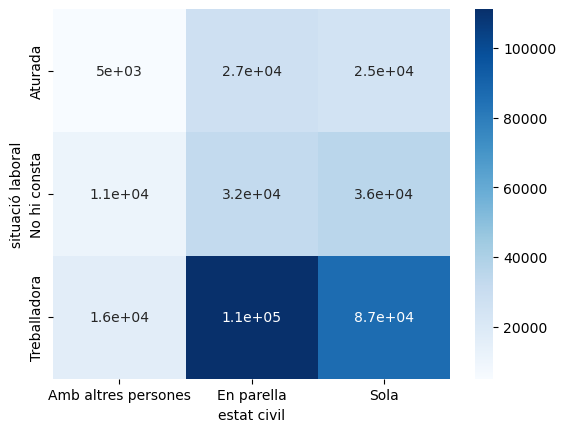

In [461]:
#Situación laboral y pareja
sns.heatmap(df_ive_cat.pivot_table(values='nombre de casos', index='situació laboral', columns='estat civil', aggfunc='sum'), cmap="Blues", annot=True)


# Datasets de df_abortos

In [462]:
t5["origen"] = "metodo"
t6["origen"] = "edad"
t7["origen"] = "motivo"
t8["origen"] = "gestacion"

In [463]:
df_abortos = pd.concat([t5, t6, t7, t8], ignore_index=True)

In [464]:
df_abortos.head()

,Año,Concepto,Tipo territorio,Código territorio,Territorio,Valor,Unidad,Estado dato,origen
0,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,3728,Número,NaN,metodo
1,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,424,Número,NaN,metodo
2,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,16231,Número,NaN,metodo
3,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,304,Número,NaN,metodo
4,2011,Abortos voluntarios de mujeres residentes real...,Otros,NaN,NaN,76,Número,NaN,metodo


In [465]:
df_abortos.columns

Index(['Año', 'Concepto', 'Tipo territorio', 'Código territorio', 'Territorio',
       'Valor', 'Unidad', 'Estado dato', 'origen'],
      dtype='object')

In [466]:
df_abortos = df_abortos.drop(['Tipo territorio', 'Código territorio', 'Territorio', 'Unidad', 'Estado dato'], axis=1)

In [467]:
df_abortos = df_abortos.rename(columns={'Valor': 'Total'})

In [468]:
def limpiar_concepto_abortos(df):
    reemplazos = {
        'Abortos voluntarios de mujeres residentes realizados por el método de ': '',
        'Abortos voluntarios de mujeres residentes realizados por otros métodos / ': '',
        'Abortos voluntarios de mujeres residentes entre ': '',
        'Abortos voluntarios de mujeres residentes de ' : '',
        'Abortos voluntarios de mujeres residentes menores de ' : '<',
        'Abortos voluntarios de mujeres residentes a ' : '',
        'Abortos voluntarios de mujeres residentes por ' : '',
    }
    
    for buscar, nuevo in reemplazos.items():
        df["Concepto"] = df["Concepto"].str.replace(buscar, nuevo, regex=False)
    
    df["Concepto"] = df["Concepto"].str.strip()
    return df

df_abortos = limpiar_concepto_abortos(df_abortos)
df_abortos["Concepto"]

0              dilatación y evacuación
1                         mifepristona
2              dilatación y aspiración
3                      prostaglandinas
4                            no consta
                     ...              
1274      11 y 12 semanas de gestación
1275       9 y 12 semanas de gestación
1276      13 y 15 semanas de gestación
1277      13 y 16 semanas de gestación
1278    8 o menos semanas de gestación
Name: Concepto, Length: 1279, dtype: object

In [469]:
df_abortos["Concepto"] = (
    df_abortos["Concepto"]
    .str.replace("años", "", regex=False)
    .str.replace("riesgo de graves anomalías del feto", "", regex=False)
    .str.replace("grave riesgo para la vida o salud de la embarazada", "salud materna", regex=False)
    .str.replace("riesgo de graves anomalías del feto", "riesgo fetal", regex=False)
    .str.replace("anomalías fetales incompatibles con la vida o enfermedad extremadamente grave e incurable", "riesgo fetal", regex=False)
    .str.replace("los que no constan los motivos" , "motivos varios", regex=False)
    .str.replace('semanas de gestación', '', regex=False)
    .str.replace('semanas', '', regex=False)
    .str.replace(' de gestación', '', regex=False)
    .str.replace('los que no consta las', 'no consta', regex=False)
    .str.strip()
)

In [470]:
df_abortos["Total"] = df_abortos["Total"].replace(["-", " ", "", "s/d", "na"], None)
df_abortos["Total"] = pd.to_numeric(df_abortos["Total"])
#df_abortos.loc[~df_abortos["Total"].apply(lambda x: isinstance(x, (int, float))), "Total"].unique()

df_abortos["Total"] = pd.to_numeric(df_abortos["Total"], errors="coerce")
df_abortos["Total"] = df_abortos["Total"].astype("Int64")  # enteros con soporte NaN

df_abortos["Total"] = df_abortos["Total"].fillna(0).astype(int)


df_abortos['Total'] = df_abortos['Total'].replace(0, np.nan)
df_abortos = df_abortos.dropna(subset=['Total'])

In [471]:
df_metodo     = df_abortos[df_abortos["origen"] == "metodo"].copy()
df_edad       = df_abortos[df_abortos["origen"] == "edad"].copy()
df_motivo     = df_abortos[df_abortos["origen"] == "motivo"].copy()
df_gestacion  = df_abortos[df_abortos["origen"] == "gestacion"].copy()


In [472]:
df_edad = df_edad[df_edad["Concepto"] != "Total abortos voluntarios de mujeres residentes"]

In [473]:
df_abortos[df_abortos["Concepto"].isin(["riesgo de graves anomalías del feto", "anomalías fetales incompatibles con la vida o enfermedad extremadamente grave e incurable",'riesgo fetal'])].tail()



,Año,Concepto,Total,origen
735,2020,riesgo fetal,18.0,motivo
740,2021,riesgo fetal,14.0,motivo
748,2022,riesgo fetal,42.0,motivo
761,2023,riesgo fetal,16.0,motivo
767,2024,riesgo fetal,18.0,motivo


se tiene que ver las columnas que se usaran en caso de que haya altras y no se especifica juntar esas columnas porque no es relevante tener dos que al final significa lo mismo, quiero tambien ver el nombre de las columnas porque al mostrar los datos en el grafico se mostrara ese nombre y si es largo queda feo, tambien mirar cada columna que dato tiene y si se puede hacer algo con ello 
Fracàs TF + dilatació + aspiració / evacuació / raspament',

## Cifra por año y tipo de métodos y motivo 
## Causas( que influye) correlacionar de la edad de causas 
## Cuál es el método más utilizado 
## Explicar los tipos de métodos 
## Especificar 
## Las personas que trabajan y qué edades 
## Las mujeres que tienen hijo por edad y las que no pero todo por edades
## Cuáles son las que más aborta las extranjera o españolas 
## Lo de la gestación cuantos casos por gestación hay 

In [482]:
df_abortos_temporal = df_abortos[df_abortos["Concepto"] != "Total abortos voluntarios de mujeres residentes"]
df = df_abortos_temporal[(df_abortos_temporal['Año'] >= 2008) & (df_abortos_temporal['Año'] <= 2022)].copy()


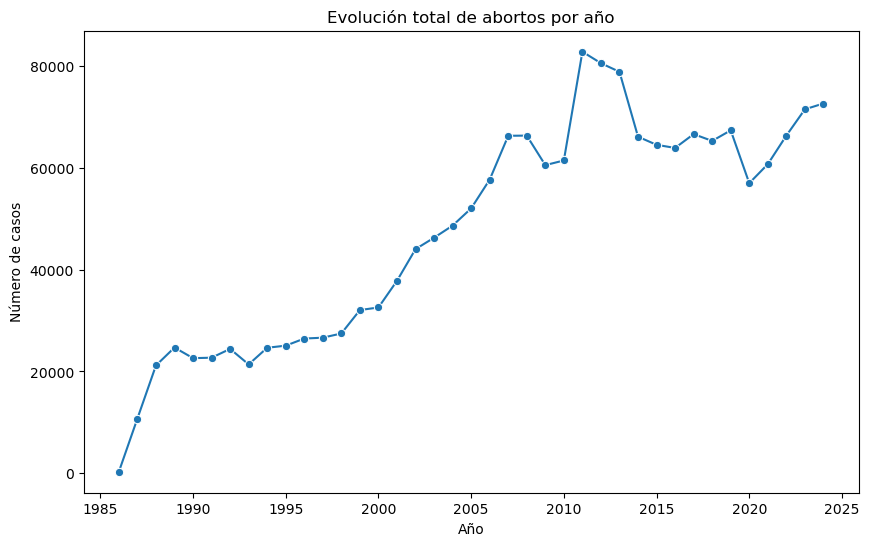

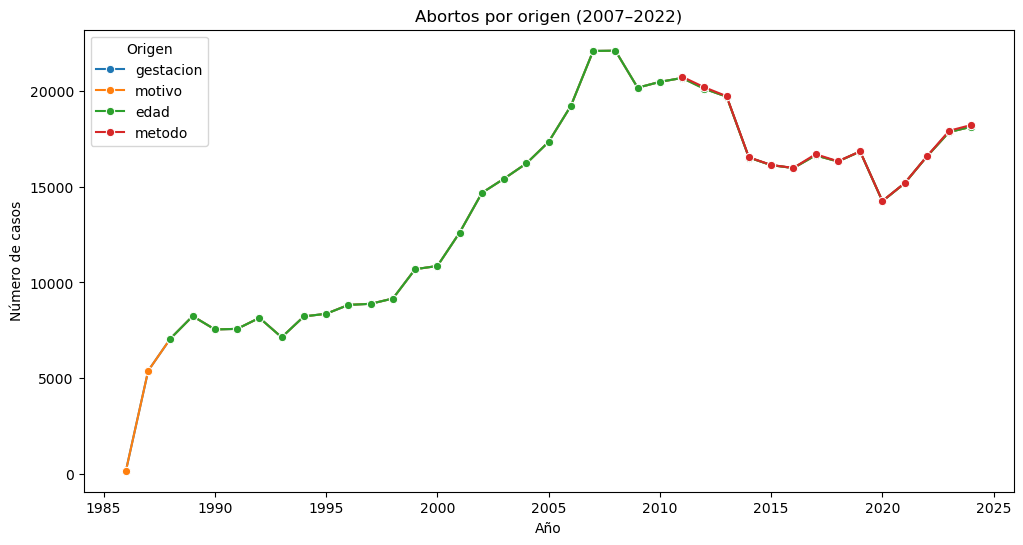

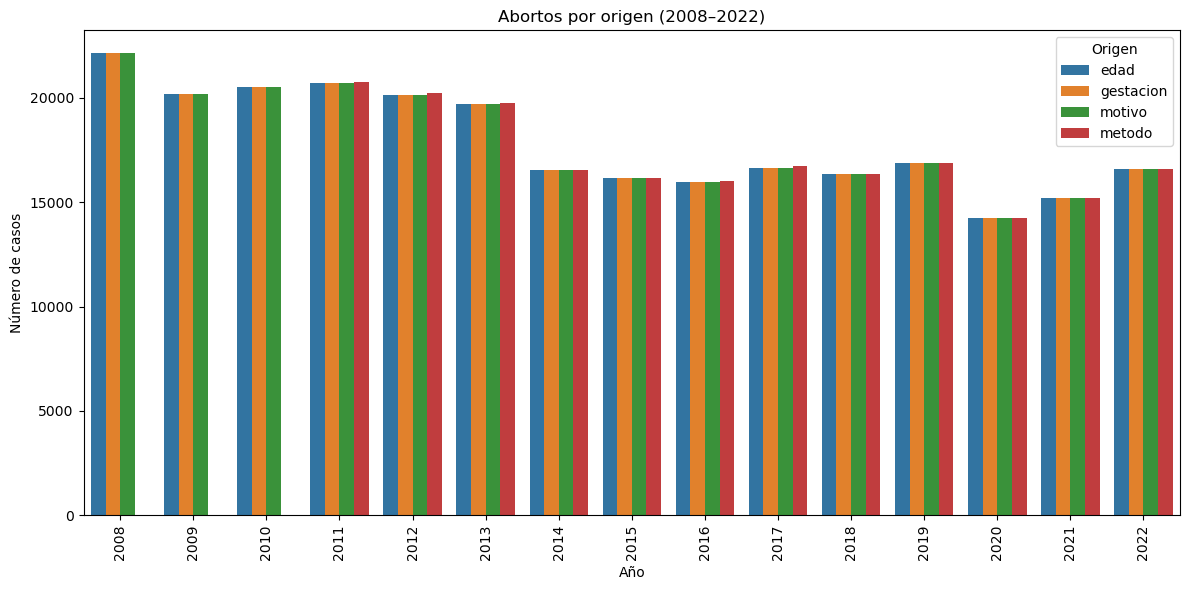

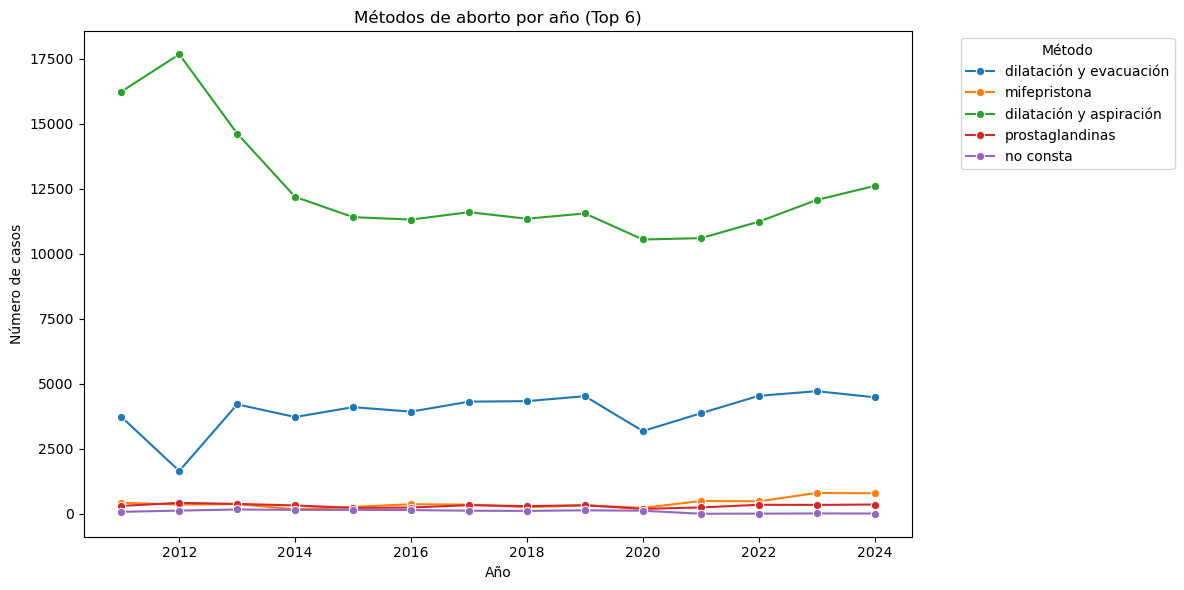

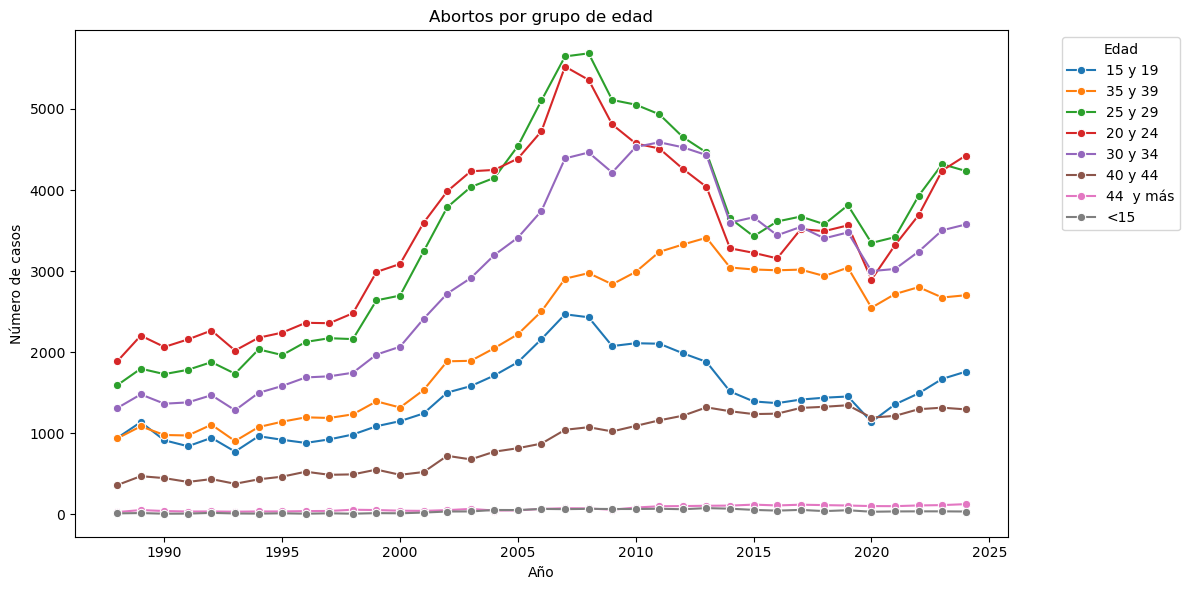

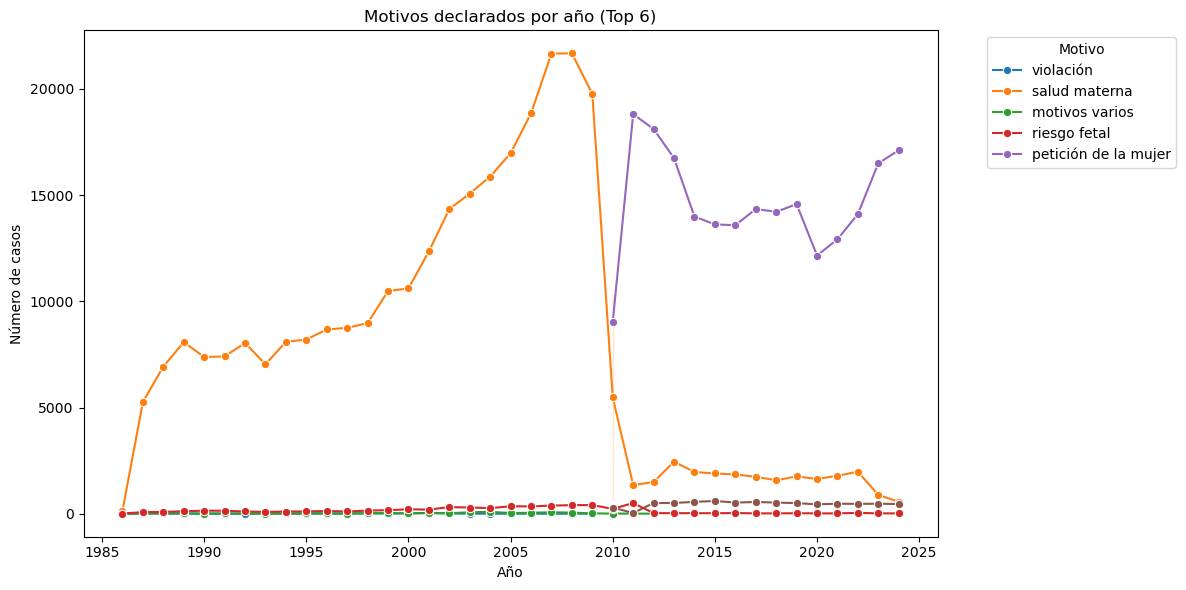

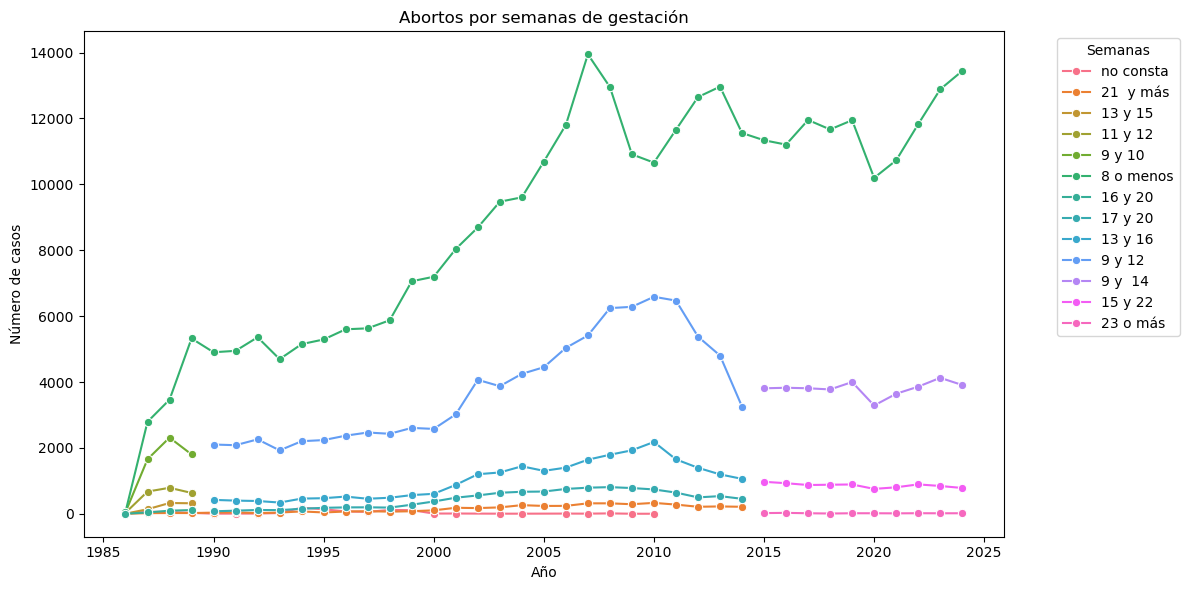

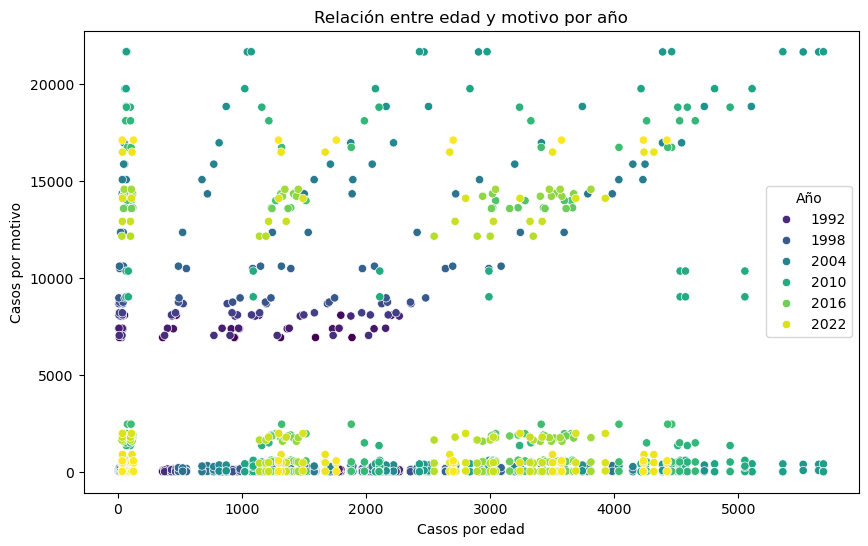

In [484]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# 1. Panorama general
# ---------------------------
plt.figure(figsize=(10,6))
sns.lineplot(data=df_abortos_temporal.groupby('Año')['Total'].sum().reset_index(),
             x='Año', y='Total', marker='o')
plt.title('Evolución total de abortos por año')
plt.xlabel('Año'); plt.ylabel('Número de casos')
plt.show()

# ---------------------------
# 2. Desglose por origen
# ---------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=df_abortos_temporal.groupby(['Año','origen'])['Total'].sum().reset_index(),
             x='Año', y='Total', hue='origen', marker='o')
plt.title('Abortos por origen (2007–2022)')
plt.xlabel('Año'); plt.ylabel('Número de casos')
plt.legend(title='Origen')
plt.show()


plt.figure(figsize=(12,6))

sns.barplot(
    data=df.groupby(['Año','origen'])['Total'].sum().reset_index(),
    x='Año', y='Total',
    hue='origen',
    
)

plt.title('Abortos por origen (2008–2022)')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.legend(title='Origen')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
# ---------------------------
# 3. Zoom en cada origen
# ---------------------------

# 1. Métodos de aborto por año
df_metodo_top = df_metodo.groupby('Concepto')['Total'].sum().nlargest(6).index
df_metodo_plot = df_metodo[df_metodo['Concepto'].isin(df_metodo_top)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_metodo_plot, x='Año', y='Total', hue='Concepto', marker='o')
plt.title('Métodos de aborto por año (Top 6)')
plt.xlabel('Año'); plt.ylabel('Número de casos')
plt.legend(title='Método', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout(); plt.show()

# 2. Abortos por grupo de edad
plt.figure(figsize=(12,6))
sns.lineplot(data=df_edad, x='Año', y='Total', hue='Concepto', marker='o')
plt.title('Abortos por grupo de edad')
plt.xlabel('Año'); plt.ylabel('Número de casos')
plt.legend(title='Edad', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout(); plt.show()

# 3. Motivos declarados por año
df_motivo_top = df_motivo.groupby('Concepto')['Total'].sum().nlargest(6).index
df_motivo_plot = df_motivo[df_motivo['Concepto'].isin(df_motivo_top)]

plt.figure(figsize=(12,6))
sns.lineplot(data=df_motivo_plot, x='Año', y='Total', hue='Concepto', marker='o')
plt.title('Motivos declarados por año (Top 6)')
plt.xlabel('Año'); plt.ylabel('Número de casos')
plt.legend(title='Motivo', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout(); plt.show()

# 4. Abortos por semanas de gestación
plt.figure(figsize=(12,6))
sns.lineplot(data=df_gestacion, x='Año', y='Total', hue='Concepto', marker='o')
plt.title('Abortos por semanas de gestación')
plt.xlabel('Año'); plt.ylabel('Número de casos')
plt.legend(title='Semanas', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout(); plt.show()

# ---------------------------
# 4. Conexiones internas (ejemplo)
# ---------------------------

# Edad vs Motivo (cruce)
edad_motivo = pd.merge(
    df_edad[['Año','Concepto','Total']],
    df_motivo[['Año','Concepto','Total']],
    on='Año', suffixes=('_edad','_motivo')
)

plt.figure(figsize=(10,6))
sns.scatterplot(data=edad_motivo, x='Total_edad', y='Total_motivo', hue='Año', palette='viridis')
plt.title('Relación entre edad y motivo por año')
plt.xlabel('Casos por edad'); plt.ylabel('Casos por motivo')
plt.show()


In [476]:
# Filtrar 2007–2022
df = df_abortos_temporal[(df_abortos_temporal['Año'] >= 2008) & (df_abortos_temporal['Año'] <= 2022)].copy()

# Revisa orígenes disponibles
print(df['origen'].value_counts())


origen
edad         120
gestacion     70
motivo        64
metodo        60
Name: count, dtype: int64


Evolución por origen

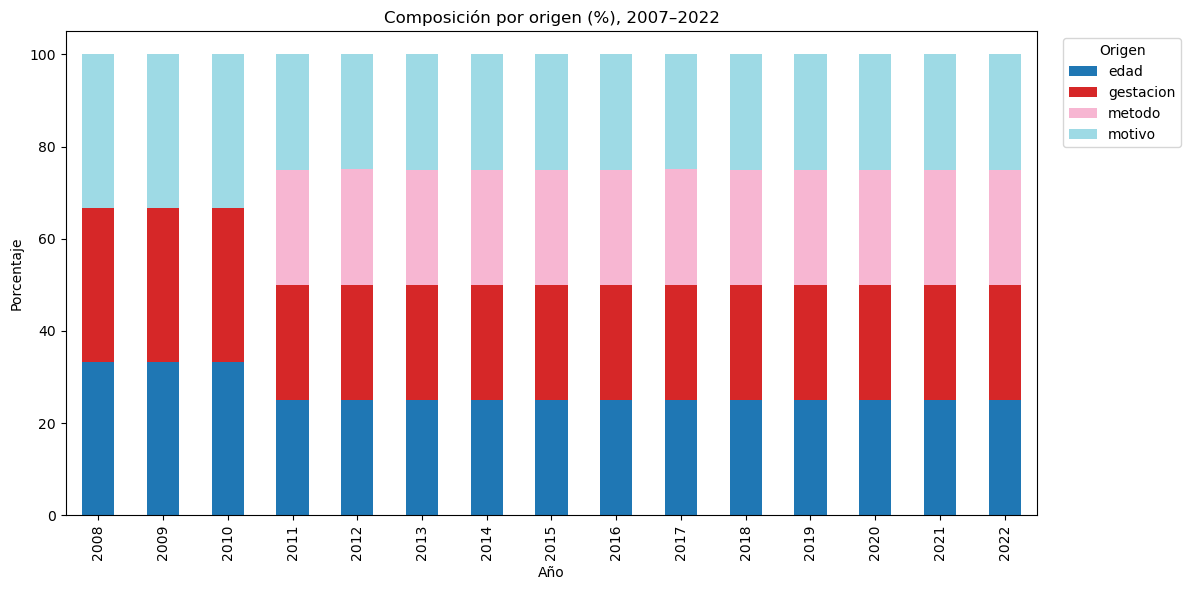

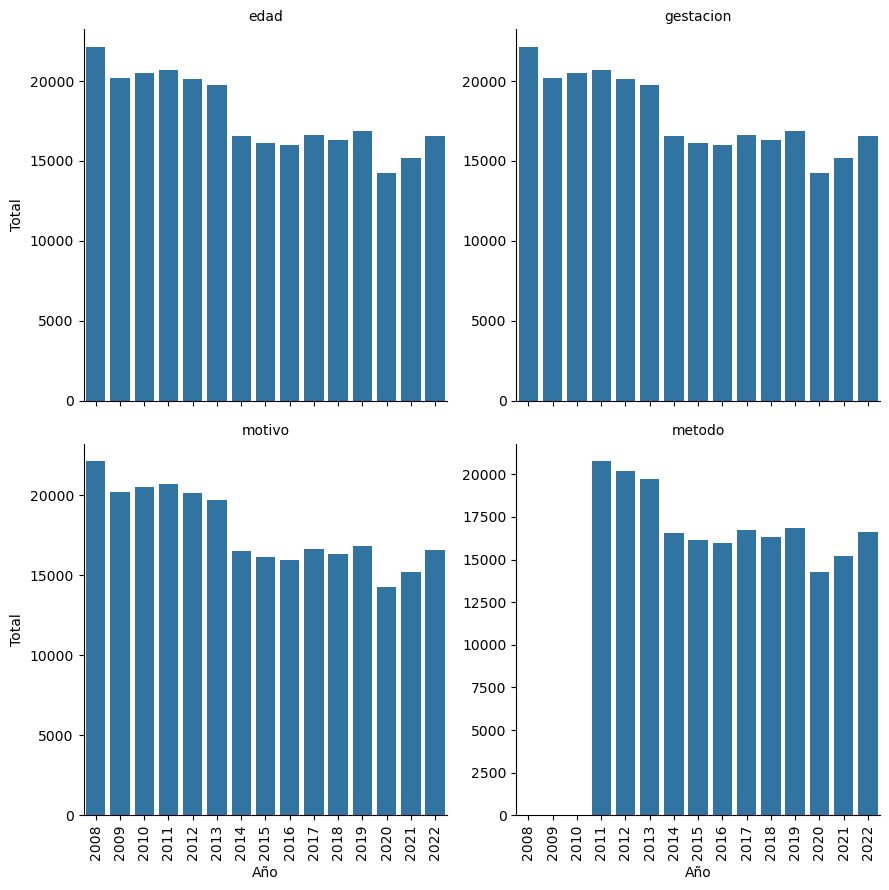

In [477]:
# 1) Barras apiladas en porcentaje por año y origen
pivot = df.groupby(['Año','origen'])['Total'].sum().unstack().fillna(0)
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

ax = pivot_pct.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
ax.set_title('Composición por origen (%), 2007–2022')
ax.set_xlabel('Año'); ax.set_ylabel('Porcentaje')
ax.legend(title='Origen', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout(); plt.show()

# 2) Facetas: una subgráfica por origen (reduce solapamiento)
g = sns.FacetGrid(
    df.groupby(['Año','origen'])['Total'].sum().reset_index(),
    col='origen', col_wrap=2, height=4.5, sharey=False
)
g.map_dataframe(sns.barplot, x='Año', y='Total', color='#1f77b4')
g.set_titles('{col_name}'); g.set_axis_labels('Año','Total')

for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)


plt.tight_layout(); plt.show()


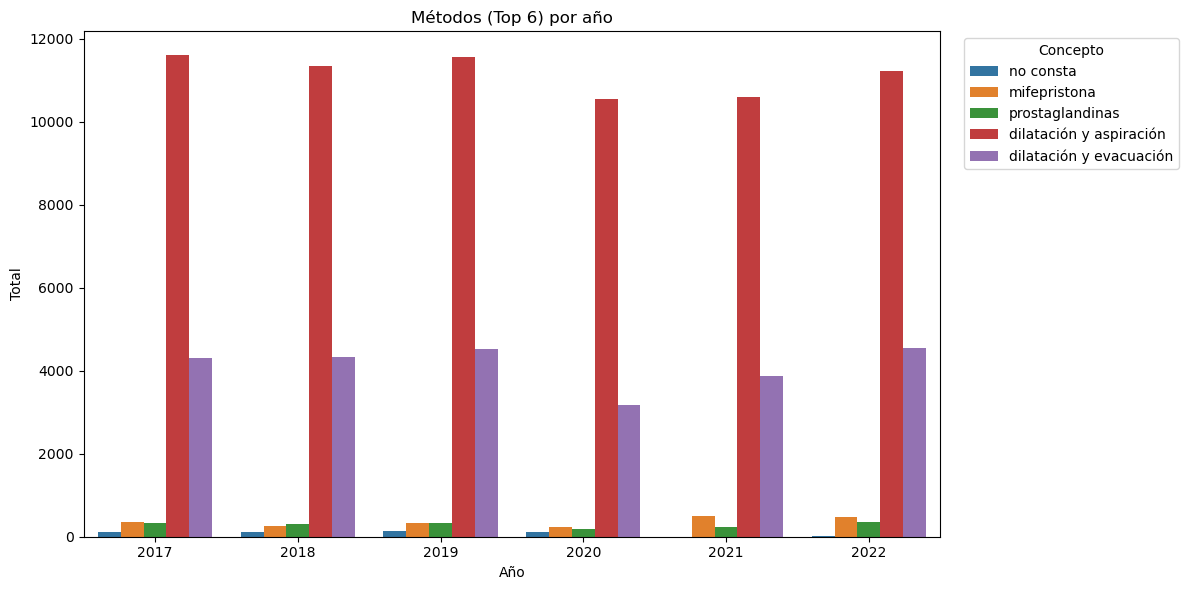

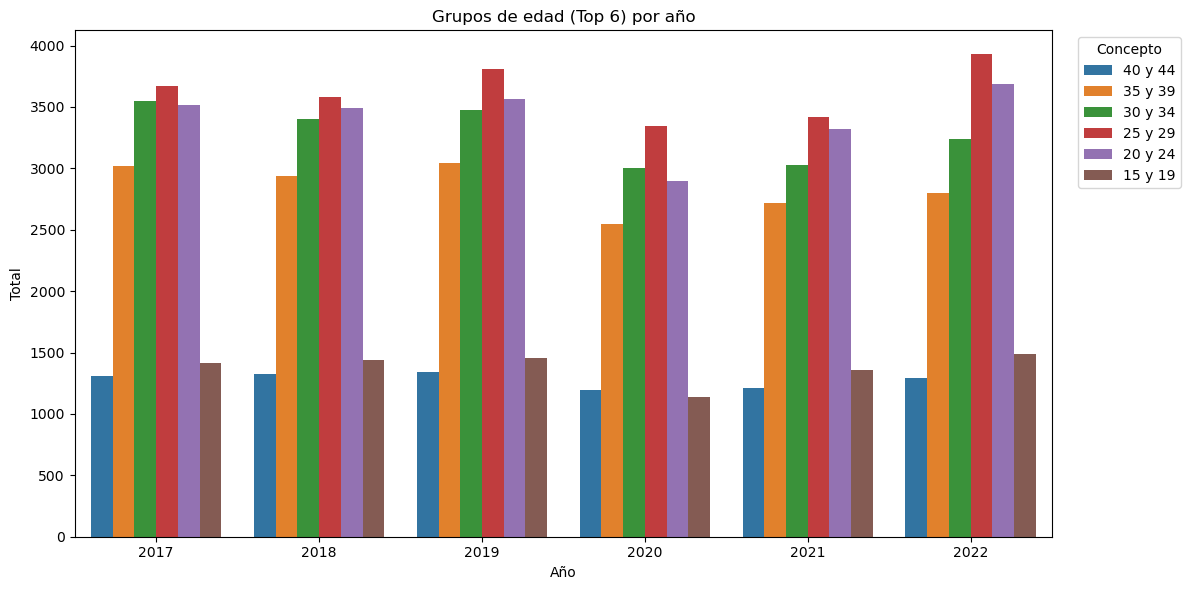

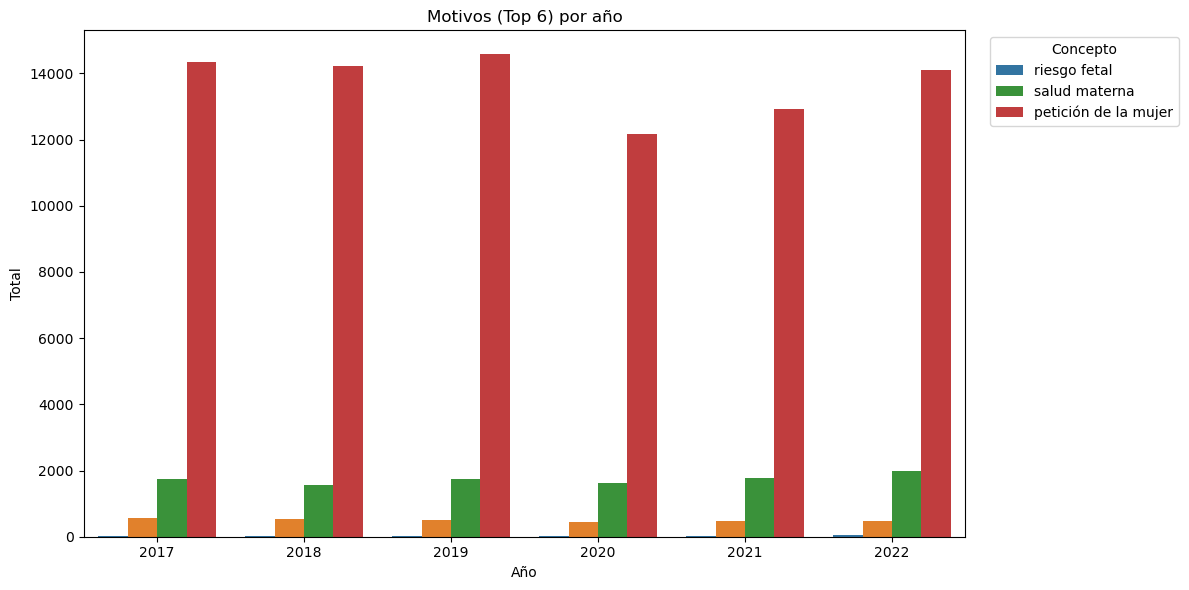

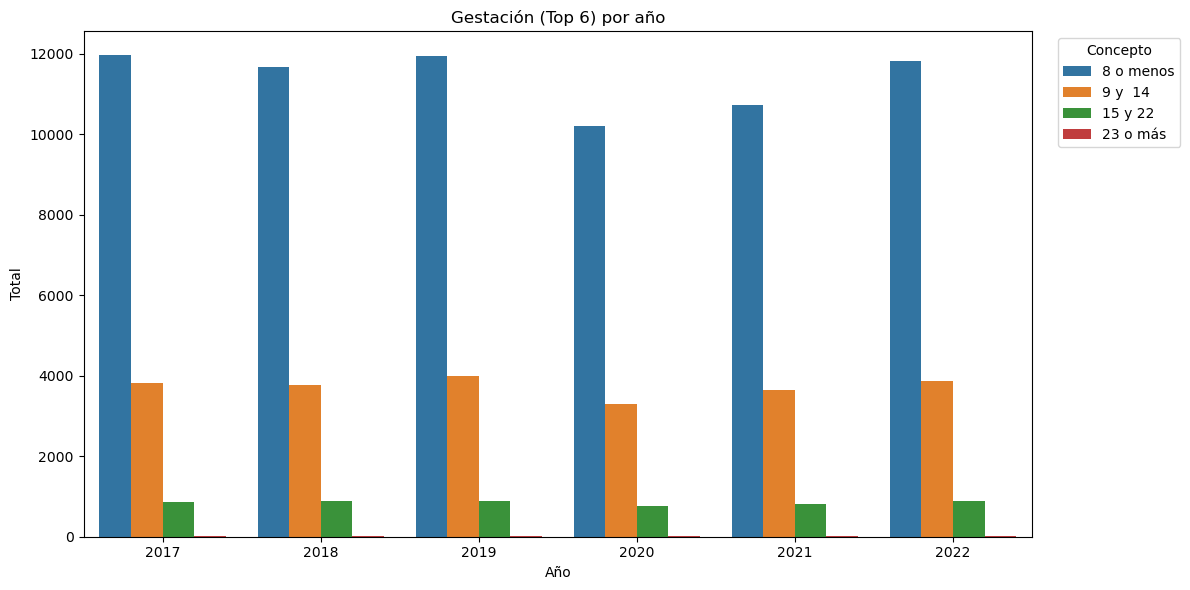

In [478]:
def evolucion_topk(df_tema, k=6, titulo=''):
    base = df_tema[(df_tema['Año'] >= 2017) & (df_tema['Año'] <= 2022)].copy()
    top = (base.groupby('Concepto')['Total'].sum()
                 .nlargest(k)
                 .index)
    sub = base[base['Concepto'].isin(top)]
    plt.figure(figsize=(12,6))
    sns.barplot(data=sub, x='Año', y='Total', hue='Concepto')
    plt.title(titulo); plt.xlabel('Año'); plt.ylabel('Total')
    plt.legend(title='Concepto', bbox_to_anchor=(1.02,1), loc='upper left')
    plt.tight_layout(); plt.show()

# Método
evolucion_topk(df_metodo, k=6, titulo='Métodos (Top 6) por año')

# Edad
evolucion_topk(df_edad, k=6, titulo='Grupos de edad (Top 6) por año')

# Motivo
evolucion_topk(df_motivo, k=6, titulo='Motivos (Top 6) por año')

# Gestación
evolucion_topk(df_gestacion, k=6, titulo='Gestación (Top 6) por año')


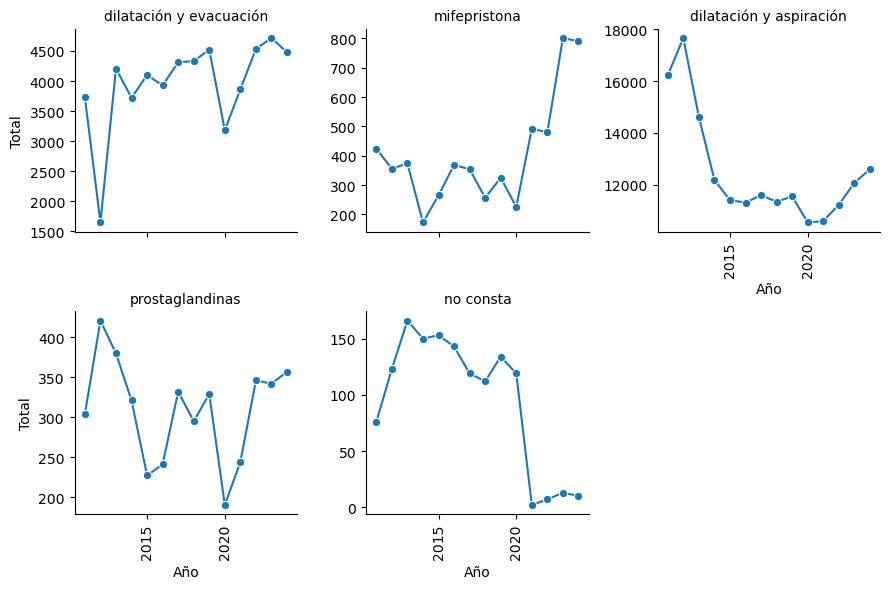

In [479]:
df_metodo_filtrado = df_metodo[df_metodo['Año'] >= 2010]

g = sns.FacetGrid(df_metodo_filtrado, col='Concepto', col_wrap=3, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x='Año', y='Total', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Año','Total')

# Rotar etiquetas de los años para que se lean bien
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()





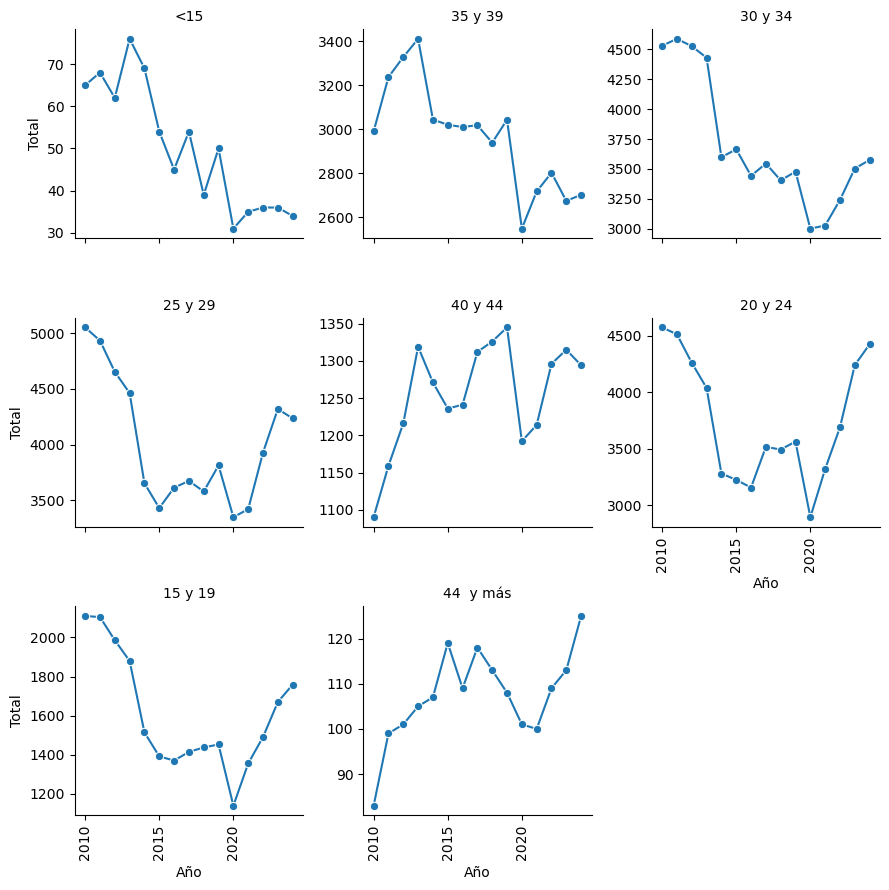

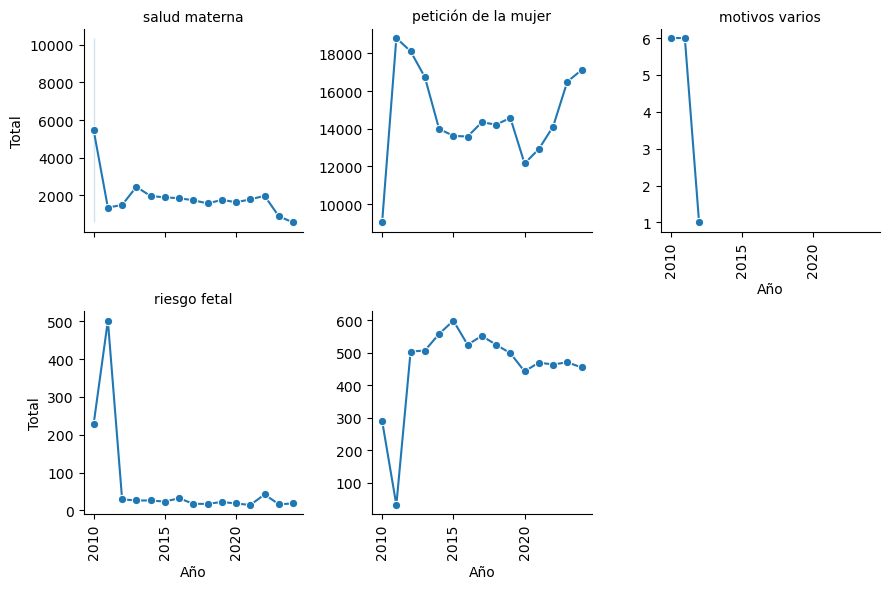

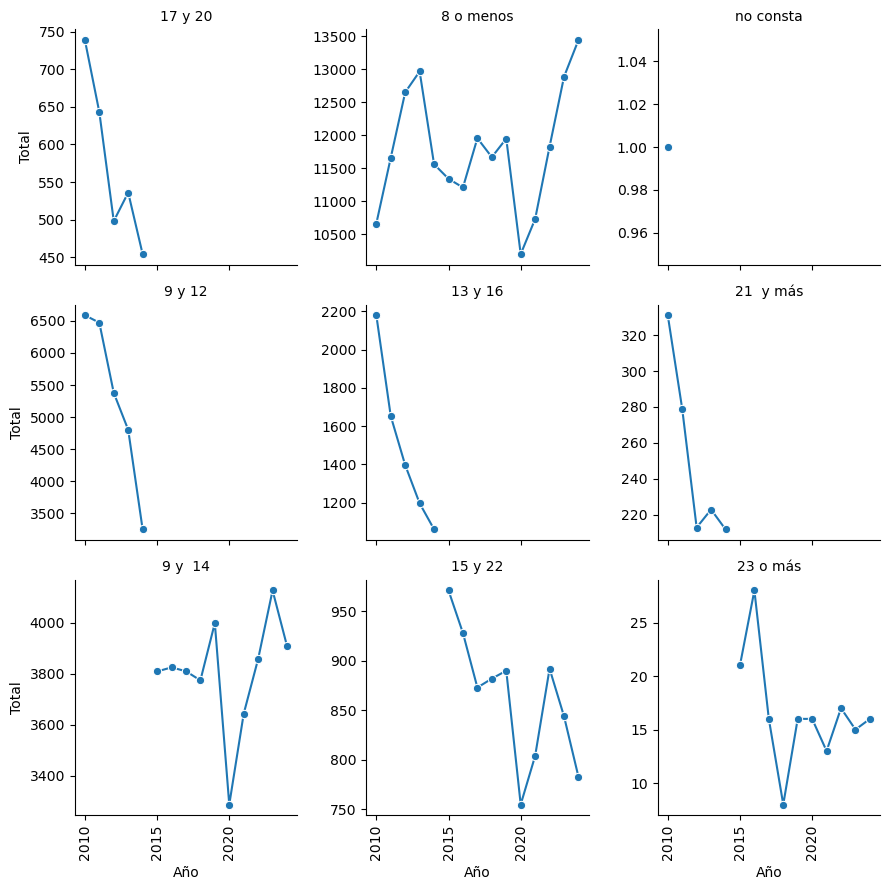

In [481]:
# Edad
df_edad_filtrado = df_edad[df_edad['Año'] >= 2010]
g = sns.FacetGrid(df_edad_filtrado, col='Concepto', col_wrap=3, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x='Año', y='Total', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Año','Total')
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout(); plt.show()

# Motivo
df_motivo_filtrado = df_motivo[df_motivo['Año'] >= 2010]
g = sns.FacetGrid(df_motivo_filtrado, col='Concepto', col_wrap=3, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x='Año', y='Total', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Año','Total')
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout(); plt.show()

# Gestación
df_gestacion_filtrado = df_gestacion[df_gestacion['Año'] >= 2010]
g = sns.FacetGrid(df_gestacion_filtrado, col='Concepto', col_wrap=3, height=3, sharey=False)
g.map_dataframe(sns.lineplot, x='Año', y='Total', marker='o')
g.set_titles('{col_name}')
g.set_axis_labels('Año','Total')
for ax in g.axes.flatten():
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout(); plt.show()
